In [1]:
# --------------------------------------------
# 🩺 Step 1: Import Libraries & Create Dataset
# --------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create simulated patient dataset
np.random.seed(42)
num_patients = 200

data = {
    "Patient_ID": range(1, num_patients + 1),
    "Age": np.random.randint(18, 80, num_patients),
    "Gender": np.random.choice(["Male", "Female"], num_patients),
    "Disease": np.random.choice(["Cardiac", "Diabetes", "Flu", "COVID", "Cancer"], num_patients),
    "Treatment_Cost": np.random.randint(5000, 150000, num_patients),
    "Hospital_Stay_Days": np.random.randint(1, 30, num_patients),
    "Outcome": np.random.choice(["Recovered", "Not Recovered"], num_patients, p=[0.85, 0.15]),
    "Department": np.random.choice(["Cardiology", "Oncology", "General", "Emergency"], num_patients),
    "Admission_Date": pd.date_range(start="2024-01-01", periods=num_patients, freq="D")
}

df = pd.DataFrame(data)
df.head()


,Patient_ID,Age,Gender,Disease,Treatment_Cost,Hospital_Stay_Days,Outcome,Department,Admission_Date
0,1,56,Female,COVID,113940,14,Recovered,General,2024-01-01
1,2,69,Male,Flu,43494,1,Recovered,Cardiology,2024-01-02
2,3,46,Male,Cardiac,8373,19,Recovered,Emergency,2024-01-03
3,4,32,Male,Flu,148233,13,Recovered,Cardiology,2024-01-04
4,5,60,Male,Cardiac,102532,13,Recovered,Oncology,2024-01-05


In [2]:
# --------------------------------------------
# 🧹 Step 2: Data Cleaning
# --------------------------------------------

print("Missing values before cleaning:\n", df.isnull().sum())

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Ensure correct data types
df["Admission_Date"] = pd.to_datetime(df["Admission_Date"])

# Rename columns for clarity
df.rename(columns={"Hospital_Stay_Days": "Stay_Days"}, inplace=True)

print("\nDataset info after cleaning:")
df.info()


Missing values before cleaning:
 Patient_ID            0
Age                   0
Gender                0
Disease               0
Treatment_Cost        0
Hospital_Stay_Days    0
Outcome               0
Department            0
Admission_Date        0
dtype: int64

Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Patient_ID      200 non-null    int64         
 1   Age             200 non-null    int64         
 2   Gender          200 non-null    object        
 3   Disease         200 non-null    object        
 4   Treatment_Cost  200 non-null    int64         
 5   Stay_Days       200 non-null    int64         
 6   Outcome         200 non-null    object        
 7   Department      200 non-null    object        
 8   Admission_Date  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64

In [3]:
# --------------------------------------------
# 📊 Step 3: Descriptive Analytics
# --------------------------------------------

# Basic summary statistics
print("\nAverage Treatment Cost:", df["Treatment_Cost"].mean())
print("Average Stay Days:", df["Stay_Days"].mean())
print("Recovery Rate:", (df["Outcome"].value_counts(normalize=True)["Recovered"] * 100).round(2), "%")

# Top 3 diseases by patient count
top_diseases = df["Disease"].value_counts().head(3)
print("\nTop 3 Diseases by count:\n", top_diseases)



Average Treatment Cost: 73167.57
Average Stay Days: 15.605
Recovery Rate: 86.5 %

Top 3 Diseases by count:
 Disease
COVID       43
Diabetes    42
Cancer      42
Name: count, dtype: int64


/tmp/ipython-input-1518059895.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Disease", y="Treatment_Cost", data=df, estimator=np.mean, ci=None)


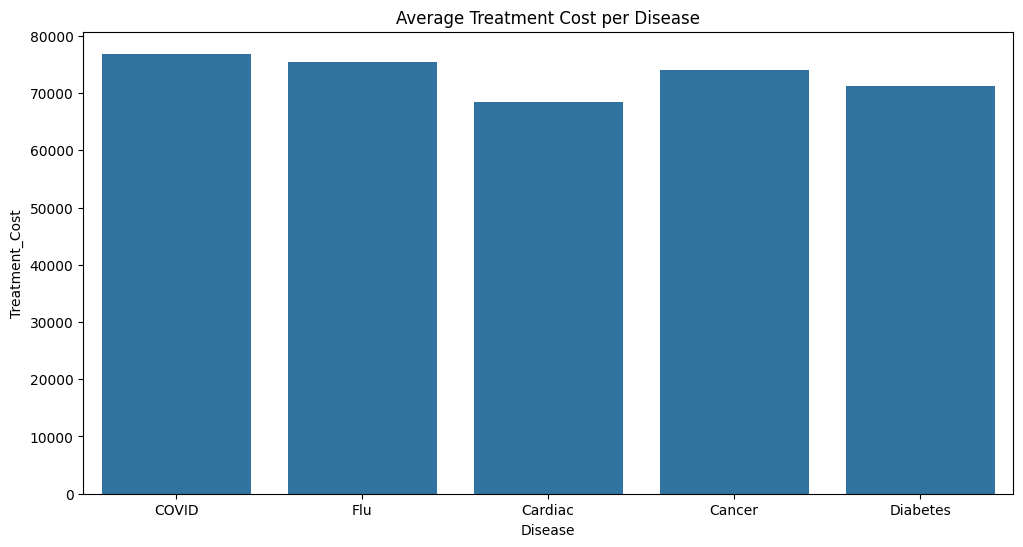

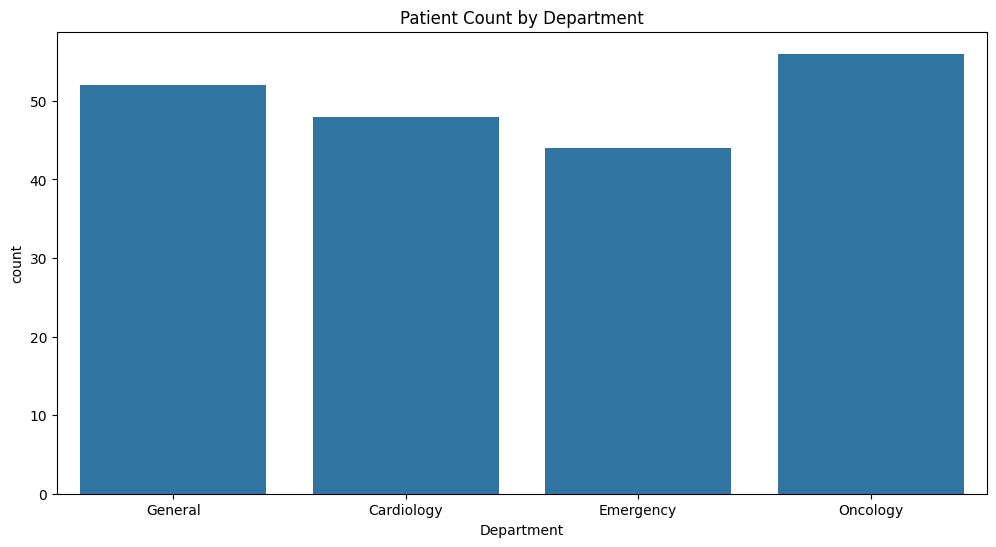

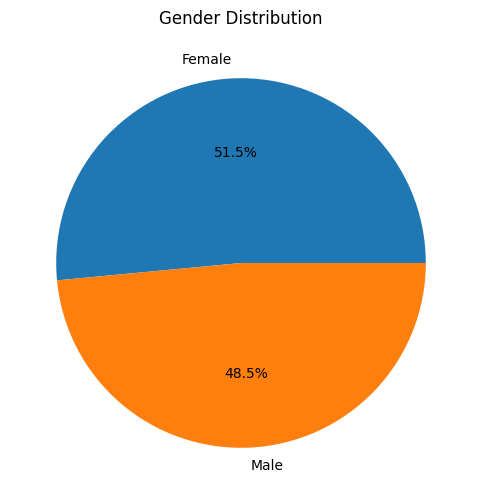

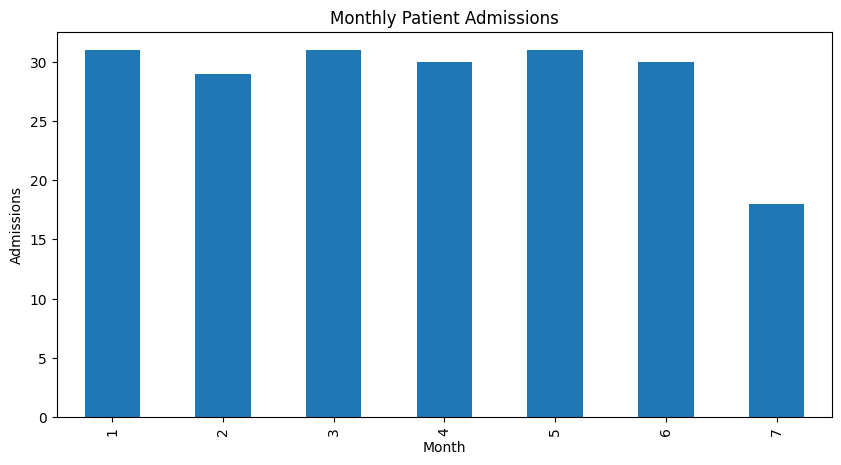

In [4]:
# --------------------------------------------
# 📈 Step 4: Visualization
# --------------------------------------------

plt.figure(figsize=(12,6))
sns.barplot(x="Disease", y="Treatment_Cost", data=df, estimator=np.mean, ci=None)
plt.title("Average Treatment Cost per Disease")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x="Department", data=df)
plt.title("Patient Count by Department")
plt.show()

plt.figure(figsize=(6,6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", title="Gender Distribution", ylabel="")
plt.show()

plt.figure(figsize=(10,5))
df["Admission_Date"].groupby(df["Admission_Date"].dt.month).count().plot(kind="bar")
plt.title("Monthly Patient Admissions")
plt.xlabel("Month")
plt.ylabel("Admissions")
plt.show()


In [5]:
# --------------------------------------------
# 🧮 Step 5: Advanced Analytics
# --------------------------------------------

# Correlation between cost and stay
corr_value = df["Treatment_Cost"].corr(df["Stay_Days"])
print("Correlation between Treatment Cost and Stay Days:", round(corr_value, 2))

# Disease-wise analysis
disease_summary = df.groupby("Disease")[["Treatment_Cost", "Stay_Days"]].mean().round(2)
print("\nAverage Cost & Stay Days by Disease:\n", disease_summary)

# Recovery rate by disease
recovery_rate = df.groupby("Disease")["Outcome"].apply(lambda x: (x=="Recovered").mean()*100).round(2)
print("\nRecovery Rate by Disease (%):\n", recovery_rate)


Correlation between Treatment Cost and Stay Days: 0.11

Average Cost & Stay Days by Disease:
           Treatment_Cost  Stay_Days
Disease                            
COVID           76885.26      17.14
Cancer          73992.40      17.55
Cardiac         68486.98      15.72
Diabetes        71159.17      14.10
Flu             75503.12      12.91

Recovery Rate by Disease (%):
 Disease
COVID       83.72
Cancer      88.10
Cardiac     85.00
Diabetes    90.48
Flu         84.85
Name: Outcome, dtype: float64


In [7]:
# --------------------------------------------
# 🧾 Step 6: Insights Summary
# --------------------------------------------

print("\n🔍 Key Insights Summary:")
print("1️⃣ Average hospital stay is around", round(df['Stay_Days'].mean(),1), "days.")
print("2️⃣ Recovery rate across all departments is",
      round((df['Outcome'] == 'Recovered').mean()*100, 2), "%.")
print("3️⃣ Diseases like", disease_summary['Treatment_Cost'].idxmax(),
      "incur the highest treatment cost.")
print("4️⃣ Patients with longer stays generally have higher treatment costs.")
print("5️⃣ The busiest department is", df['Department'].mode()[0], ".")



🔍 Key Insights Summary:
1️⃣ Average hospital stay is around 15.6 days.
2️⃣ Recovery rate across all departments is 86.5 %.
3️⃣ Diseases like COVID incur the highest treatment cost.
4️⃣ Patients with longer stays generally have higher treatment costs.
5️⃣ The busiest department is Oncology .


In [8]:
# --------------------------------------------
# 💾 Step 7: Save & Document
# --------------------------------------------

# Save to CSV and Notebook
df.to_csv("Hospital_Patient_Data.csv", index=False)
print("\n✅ Dataset saved as 'Hospital_Patient_Data.csv'")

# You can now upload both this .ipynb file and CSV to your GitHub repo.



✅ Dataset saved as 'Hospital_Patient_Data.csv'
